In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from konlpy.tag import Okt
import codecs
import pandas as pd
with codecs.open('ratings_test.txt',encoding='utf-8') as f:
    data = [i.split('\t') for i in f.read().splitlines()]
    m = data[0]
    data = data[1:]

In [2]:
p_data = pd.DataFrame(data,columns=m)
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


데이터 전처리 -> 학습하기 위한 data로 정리하는 작업

결측치 확인 (계속해야하는 작업)

In [3]:
p_data.loc[p_data.document.isnull()] # null로 되어있는 결측치는 없다.

,id,document,label


중복제거

In [4]:
len(p_data.document)

50000

In [5]:
import numpy as np # numpy  안에 unique 
p_data.document.nunique() # 판다스안에 nunique

49158

In [6]:
len(p_data)

50000

In [7]:
p_data=p_data.drop_duplicates(subset=['document']) # 조건에 의한 중복제거
# drop 받아주거나 inplace=True 둘중하나 쓰기

In [8]:
len(p_data)

49158

In [9]:
p_data.document.isnull().sum() # 중복제거 후 결측치 확인

0

In [10]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [11]:
p_data['document'] = p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') #띄어쓰기 중요

C:\Users\82105\AppData\Local\Temp/ipykernel_9160/222249111.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document'] = p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') #띄어쓰기 중요
C:\Users\82105\AppData\Local\Temp/ipykernel_9160/222249111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document'] = p_data.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') #띄어쓰기 중요


In [12]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [13]:
p_data['document'] = p_data.document.str.replace('^ +','') # 띄어쓰기 조심 
#^ 대괄호밖에있으면 특정한 글자로 시작되는~이라는뜻 +는 1개이상

C:\Users\82105\AppData\Local\Temp/ipykernel_9160/3801167913.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  p_data['document'] = p_data.document.str.replace('^ +','') # 띄어쓰기 조심
C:\Users\82105\AppData\Local\Temp/ipykernel_9160/3801167913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document'] = p_data.document.str.replace('^ +','') # 띄어쓰기 조심


In [14]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [15]:
p_data['document'] = p_data.document.replace('',np.nan)

C:\Users\82105\AppData\Local\Temp/ipykernel_9160/2208287581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_data['document'] = p_data.document.replace('',np.nan)


In [16]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,NaN,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [17]:
p_data.document.isnull().sum()

306

In [18]:
p_data = p_data.dropna(how='any',axis=0) # axis=1은 열 axis=0는 행

In [19]:
p_data

,id,document,label
0,6270596,굳 ㅋ,1
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
5,7898805,음악이 주가 된 최고의 음악영화,1
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
49997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [20]:
s_w = ['은','는','이','가','를','들','에게','의','을','도','으로','만','라서','하다']

In [21]:
okt = Okt()

In [22]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [23]:
tk_d = okt.morphs(p_data.document[2])

In [24]:
[w for w in tk_d if not w in s_w]

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [25]:
from tqdm import tqdm
X_data = []
for i in tqdm(p_data['document']):
    tk_d = okt.morphs(i)
    end_d = [w for w in tk_d if not w in s_w]
    X_data.append(end_d)
X_data

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48852/48852 [01:38<00:00, 497.20it/s]


[['굳', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아'],
 ['지루하지는', '않은데', '완전', '막장', '임', '돈', '주고', '보기', '에는'],
 ['아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '로', '나와서', '제', '심기', '불편하게', '하죠'],
 ['음악', '주가', '된', '최고', '음악', '영화'],
 ['진정한', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온듯',
  '한',
  '창의력',
  '없는',
  '로봇',
  '디자인',
  '부터가',
  '고개',
  '젖게',
  '한다'],
 ['갈수록',
  '개판',
  '되가는',
  '중국영화',
  '유치하고',
  '내용',
  '없음',
  '폼',
  '잡다',
  '끝남',
  '말',
  '안되는',
  '무기',
  '에',
  '유치한',
  '남무',
  '아',
  '그립다',
  '동사서독',
  '같은',
  '영화',
  '이건',
  '류',
  '아',
  '류작',
  '이다'],
 ['이별', '아픔', '뒤', '에', '찾아오는', '새로운', '인연', '기쁨', '모든', '사람', '그렇지는', '않네'],
 ['괜찮네요', '오랜', '포켓몬스터', '잼밌', '어', '요'],
 ['한국', '독립영화', '한계', '그렇게', '아버지', '된다와', '비교', '됨'],
 ['청춘',
  '아름답다',
  '그',
  '아름다',
  '움',
  '이성',
  '흔들어',
  '놓는다',
  '찰나',
  '아름다',
  '움',
  '잘',
  '포착',
  '한',
  '섬세하고',
  '아름다운',
  '수채화',
  '같은',
  '퀴어',
  '영화',
  '이다'],
 ['눈', '에', '보이는', '반전', '이었지만', '영화', '흡인', '

In [26]:
tk = Tokenizer()
tk.fit_on_texts(X_data)
tk.word_index

{'영화': 1,
 '에': 2,
 '너무': 3,
 '한': 4,
 '다': 5,
 '정말': 6,
 '진짜': 7,
 '적': 8,
 '로': 9,
 '점': 10,
 '에서': 11,
 '평점': 12,
 '연기': 13,
 '것': 14,
 '과': 15,
 '내': 16,
 '최고': 17,
 '그': 18,
 '인': 19,
 '잘': 20,
 '안': 21,
 '나': 22,
 '와': 23,
 '생각': 24,
 '이런': 25,
 '게': 26,
 '못': 27,
 '왜': 28,
 '스토리': 29,
 '이다': 30,
 '드라마': 31,
 '사람': 32,
 '감동': 33,
 '하는': 34,
 '보고': 35,
 '때': 36,
 '더': 37,
 '하고': 38,
 '고': 39,
 '말': 40,
 '감독': 41,
 '배우': 42,
 'ㅋㅋ': 43,
 '아': 44,
 '그냥': 45,
 '내용': 46,
 '거': 47,
 '까지': 48,
 '중': 49,
 '재미': 50,
 '보다': 51,
 '본': 52,
 '시간': 53,
 '요': 54,
 '없는': 55,
 '좀': 56,
 '뭐': 57,
 '수': 58,
 '지': 59,
 '네': 60,
 '봤는데': 61,
 '쓰레기': 62,
 '사랑': 63,
 '볼': 64,
 '작품': 65,
 '다시': 66,
 '하나': 67,
 '없다': 68,
 '할': 69,
 '마지막': 70,
 'ㅠㅠ': 71,
 '이건': 72,
 '저': 73,
 '같은': 74,
 '정도': 75,
 '있는': 76,
 '좋은': 77,
 '완전': 78,
 '처음': 79,
 'ㅋ': 80,
 '장면': 81,
 '주인공': 82,
 'ㅋㅋㅋ': 83,
 '이렇게': 84,
 '입니다': 85,
 '액션': 86,
 '하': 87,
 '최악': 88,
 '걸': 89,
 '보는': 90,
 '이야기': 91,
 '지금': 92,
 '끝': 93,
 'ㅡㅡ': 94,
 '연출

In [27]:
len(tk.word_index)

54256

In [28]:
ck_data1 = list(tk.word_counts.items())

In [29]:
ck_data2 = sorted(ck_data1, key = lambda x:x[1])

In [30]:
ck_data3 = [d for d in ck_data2 if d[1]>4]

In [31]:
len(ck_data3)

10419

In [32]:
tk = Tokenizer(num_words=10420)
tk.fit_on_texts(X_data)
len(tk.word_index)

54256

In [33]:
ck_x = tk.texts_to_sequences(X_data)
np.unique(ck_x)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


array([list([]), list([1]),
       list([1, 1, 18, 189, 9, 344, 1003, 5095, 607, 127, 1589, 19, 202, 516, 1469, 171, 143, 4537, 516]),
       ..., list([10416, 293, 5003, 11]), list([10416, 4639, 5755]),
       list([10418, 10418, 10418, 10418, 10418, 831])], dtype=object)

In [34]:
len(np.unique([k for i in ck_x for k in i]))

10419

In [35]:
len(p_data.label)

48852

In [36]:
len(p_data.document)

48852

In [37]:
len(X_data)

48852

In [38]:
len(ck_x)

48852

In [39]:
ck_x

[[635, 80],
 [57, 150, 12, 4670, 1555, 10, 946, 742, 37, 835, 2342],
 [2742, 78, 352, 97, 100, 407, 133, 212],
 [7859, 118, 1941, 98, 28, 9, 589, 155, 5407, 7024],
 [195, 3736, 135, 17, 195, 1],
 [721, 62],
 [1104, 370, 275, 11, 4, 55, 1942, 3272, 2473, 4408, 164],
 [429,
  1244,
  2404,
  1030,
  46,
  260,
  3273,
  2822,
  40,
  423,
  2654,
  2,
  1263,
  44,
  2555,
  74,
  1,
  72,
  388,
  44,
  2743,
  30],
 [3139, 1770, 422, 2, 907, 3140, 7025, 193, 32, 4161],
 [2343, 308, 361, 54],
 [171, 1091, 1427, 372, 642, 523, 577],
 [1131,
  1193,
  18,
  1694,
  269,
  4671,
  1694,
  269,
  20,
  4,
  5408,
  318,
  7860,
  74,
  6392,
  1,
  30],
 [225, 2, 1194, 157, 4409, 1, 8883, 330, 1164],
 [29,
  95,
  13,
  1556,
  1264,
  402,
  1,
  1557,
  867,
  5409,
  1,
  2,
  138,
  762,
  168,
  25,
  1,
  41,
  16,
  1,
  5854,
  328,
  108,
  16,
  1,
  6393,
  168,
  74,
  3274,
  2],
 [2405, 1119, 3574, 12, 57, 180],
 [17],
 [621, 1071, 27, 1895, 7, 84, 13, 27, 722, 27, 2037],
 [],

In [40]:
d_x = [i for i,n in enumerate(ck_x) if len(n)<1]

In [41]:
 for i in enumerate(ck_x):
    print(i)
    if i[0]==5:
        break

(0, [635, 80])
(1, [57, 150, 12, 4670, 1555, 10, 946, 742, 37, 835, 2342])
(2, [2742, 78, 352, 97, 100, 407, 133, 212])
(3, [7859, 118, 1941, 98, 28, 9, 589, 155, 5407, 7024])
(4, [195, 3736, 135, 17, 195, 1])
(5, [721, 62])


In [42]:
ck_x[1]

[57, 150, 12, 4670, 1555, 10, 946, 742, 37, 835, 2342]

In [43]:
X_data[1]

['뭐', '야', '평점', '나쁘진', '않지만', '점', '짜', '리', '더', '더욱', '아니잖아']

In [44]:
Y_data = np.array(p_data.label)
Y_data

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

In [45]:
d_x

[17,
 172,
 220,
 297,
 395,
 542,
 589,
 997,
 1569,
 1590,
 1597,
 2236,
 2280,
 2305,
 2373,
 2584,
 2860,
 3046,
 3101,
 3213,
 3297,
 3396,
 3482,
 3545,
 3576,
 3730,
 3788,
 3814,
 4192,
 4951,
 5162,
 5207,
 5241,
 5672,
 5814,
 5884,
 6150,
 6532,
 6667,
 6850,
 6856,
 6992,
 7060,
 7070,
 7181,
 7298,
 7724,
 7760,
 7938,
 7981,
 8211,
 8268,
 8323,
 8393,
 8553,
 8784,
 8808,
 8932,
 8966,
 8988,
 9314,
 9367,
 9437,
 9791,
 9901,
 10381,
 10502,
 10928,
 10981,
 11039,
 11263,
 11361,
 11417,
 11487,
 11969,
 11981,
 12609,
 12846,
 12907,
 12927,
 12981,
 13023,
 13034,
 13143,
 13449,
 13880,
 13918,
 13935,
 13945,
 14097,
 14153,
 14253,
 14477,
 14708,
 14868,
 15056,
 15340,
 15375,
 15706,
 15729,
 15738,
 15850,
 16504,
 16569,
 16658,
 16877,
 17085,
 17306,
 17332,
 17465,
 17560,
 17586,
 17601,
 17703,
 17805,
 17853,
 17924,
 18059,
 18302,
 18734,
 18918,
 19035,
 19241,
 19258,
 19301,
 19302,
 19484,
 19513,
 19553,
 19556,
 19715,
 19765,
 19936,
 20267,
 2

In [46]:
p_data.document[17]

'발연기 도저히 못보겠다 진짜 이렇게 연기를 못할거라곤 상상도 못했네'

In [47]:
ck_x[17]

[]

In [48]:
len(X_data),len(Y_data)

(48852, 48852)

In [49]:
tk = Tokenizer(num_words=10420)
tk.fit_on_texts(X_data)
X_data = tk.texts_to_sequences(X_data)
Y_data = np.array(p_data.label)

In [50]:
len(X_data),len(Y_data)

(48852, 48852)

In [51]:
d_idx = [i for i,n in enumerate(ck_x) if len(n)<1]

In [52]:
X_data = np.delete(X_data, d_idx, axis=0)
Y_data = np.delete(Y_data, d_idx, axis=0)# axis=0은 문장을 의미

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [53]:
len(X_data),len(Y_data)

(48530, 48530)

In [54]:
np.unique(X_data)

array([list([1]),
       list([1, 1, 18, 189, 9, 344, 1003, 5095, 607, 127, 1589, 19, 202, 516, 1469, 171, 143, 4537, 516]),
       list([1, 1, 200, 16, 334, 63, 34, 2363, 28, 25, 62, 1, 9, 6835, 466]),
       ..., list([10416, 293, 5003, 11]), list([10416, 4639, 5755]),
       list([10418, 10418, 10418, 10418, 10418, 831])], dtype=object)

In [59]:
max([len(i) for i in X_data]),min([len(i) for i in X_data])

(59, 1)

In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
ck1_data = pad_sequences(X_data)
len(ck1_data[0])

59

In [62]:
ck_df = pd.DataFrame(ck1_data)
ck_df['Y'] = Y_data

In [67]:
ck1_y = to_categorical(Y_data)

In [68]:
ck1_y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [70]:
t_x,tt_x,t_y,tt_y = train_test_split(ck1_data,ck1_y,random_state=1)
t_x.shape,tt_x.shape,t_y.shape,tt_y.shape

((36397, 59), (12133, 59), (36397, 2), (12133, 2))

In [73]:
ck_m = Sequential()
ck_m.add(Dense(2,input_shape=(59,),activation='sigmoid'))
ck_m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hy = ck_m.fit(t_x,t_y,epochs=100,validation_data=(tt_x,tt_y))

Epoch 1/100
1138/1138 [==============================] - 1s 759us/step - loss: 105.1255 - accuracy: 0.4999 - val_loss: 10.1041 - val_accuracy: 0.5095
Epoch 2/100
1138/1138 [==============================] - 1s 713us/step - loss: 4.0855 - accuracy: 0.5000 - val_loss: 3.4192 - val_accuracy: 0.5076
Epoch 3/100
1138/1138 [==============================] - 1s 735us/step - loss: 2.6642 - accuracy: 0.5029 - val_loss: 2.5427 - val_accuracy: 0.4992
Epoch 4/100
1138/1138 [==============================] - 1s 694us/step - loss: 2.6021 - accuracy: 0.5002 - val_loss: 2.6213 - val_accuracy: 0.5028
Epoch 5/100
1138/1138 [==============================] - 1s 710us/step - loss: 2.6671 - accuracy: 0.4998 - val_loss: 2.5102 - val_accuracy: 0.5020
Epoch 6/100
1138/1138 [==============================] - 1s 727us/step - loss: 2.6308 - accuracy: 0.5087 - val_loss: 2.8448 - val_accuracy: 0.4957
Epoch 7/100
1138/1138 [==============================] - 1s 715us/step - loss: 2.6253 - accuracy: 0.5019 - val_loss

1138/1138 [==============================] - 1s 723us/step - loss: 2.6137 - accuracy: 0.5005 - val_loss: 2.8303 - val_accuracy: 0.5083
Epoch 57/100
1138/1138 [==============================] - 1s 778us/step - loss: 2.7120 - accuracy: 0.5037 - val_loss: 2.3812 - val_accuracy: 0.5014
Epoch 58/100
1138/1138 [==============================] - 1s 813us/step - loss: 2.5109 - accuracy: 0.5074 - val_loss: 2.6737 - val_accuracy: 0.5077
Epoch 59/100
1138/1138 [==============================] - 1s 892us/step - loss: 2.6345 - accuracy: 0.5041 - val_loss: 2.3023 - val_accuracy: 0.5057
Epoch 60/100
1138/1138 [==============================] - 1s 819us/step - loss: 2.6336 - accuracy: 0.4987 - val_loss: 2.9511 - val_accuracy: 0.5002
Epoch 61/100
1138/1138 [==============================] - 1s 824us/step - loss: 2.5664 - accuracy: 0.5006 - val_loss: 2.4285 - val_accuracy: 0.5005
Epoch 62/100
1138/1138 [==============================] - 1s 802us/step - loss: 2.6271 - accuracy: 0.5046 - val_loss: 2.7799 

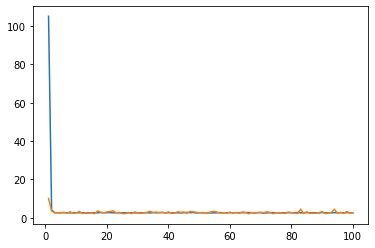

In [74]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])

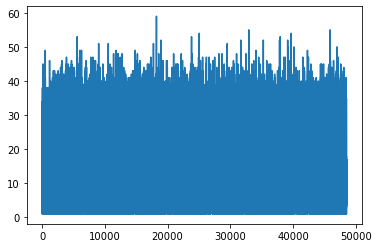

In [77]:
ck_n = [len(i) for i in X_data]
plt.plot(ck_n)

In [78]:
X_data = pad_sequences(X_data,maxlen=35)
X_data.shape

(48530, 35)

In [95]:
Y_data

array(['1', '0', '0', ..., '0', '0', '0'], dtype=object)

In [96]:
Y_data = Y_data.astype(int)

In [97]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,random_state=1)

In [102]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
m_ck = ModelCheckpoint('best_m.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

In [103]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
end_m = Sequential()
end_m.add(Embedding(10420,100))
end_m.add(LSTM(128))
end_m.add(Dense(1,activation='sigmoid'))
end_m.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
end_m.fit(t_x,t_y,epochs=12,callbacks=[es,m_ck],batch_size=64,validation_data=(tt_x,tt_y))

Epoch 1/12
569/569 [==============================] - 23s 39ms/step - loss: 0.4581 - accuracy: 0.7812 - val_loss: 0.3936 - val_accuracy: 0.8249

Epoch 00001: val_accuracy improved from -inf to 0.82494, saving model to best_m.h5
Epoch 2/12
569/569 [==============================] - 22s 39ms/step - loss: 0.3510 - accuracy: 0.8476 - val_loss: 0.3931 - val_accuracy: 0.8282

Epoch 00002: val_accuracy improved from 0.82494 to 0.82824, saving model to best_m.h5
Epoch 3/12
569/569 [==============================] - 21s 37ms/step - loss: 0.3238 - accuracy: 0.8616 - val_loss: 0.3733 - val_accuracy: 0.8321

Epoch 00003: val_accuracy improved from 0.82824 to 0.83211, saving model to best_m.h5
Epoch 4/12
569/569 [==============================] - 21s 36ms/step - loss: 0.3020 - accuracy: 0.8722 - val_loss: 0.3696 - val_accuracy: 0.8347

Epoch 00004: val_accuracy improved from 0.83211 to 0.83467, saving model to best_m.h5
Epoch 5/12
569/569 [==============================] - 21s 36ms/step - loss: 0.2

In [106]:
ck_m_end=load_model('best_m.h5')

In [107]:
ck_m_end.evaluate(tt_x,tt_y)

380/380 [==============================] - 3s 7ms/step - loss: 0.3697 - accuracy: 0.8351


[0.36974844336509705, 0.8350778818130493]

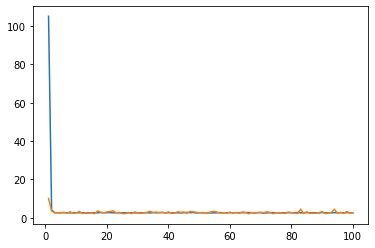

In [108]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])